In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

#Create synthetic dataset
np.random.seed(42)
n_samples = 300

study_hours = np.random.randint(0, 13, size=n_samples)
attendance = np.random.randint(50, 101, size=n_samples)
sleep_hours = np.random.randint(4, 11, size=n_samples)
extra_classes = np.random.choice(['Yes', 'No'], size=n_samples, p=[0.45, 0.55])

score = (
    study_hours * 0.4 +
    (attendance / 10.0) * 0.5 +
    np.where(extra_classes == 'Yes', 2.0, 0.0) -
    np.abs(7 - sleep_hours) * 0.5
)
label_threshold = 9.5
passed = (score >= label_threshold).astype(int)

df = pd.DataFrame({
    'study_hours': study_hours,
    'attendance': attendance,
    'sleep_hours': sleep_hours,
    'extra_classes': extra_classes,
    'pass': passed
})

df.to_csv('students.csv', index=False)
df.head()


,study_hours,attendance,sleep_hours,extra_classes,pass
0,6,56,8,No,0
1,3,65,6,Yes,0
2,12,75,8,No,0
3,10,97,7,No,0
4,7,98,4,Yes,0


In [2]:
#Load data, preprocess
df = pd.read_csv('students.csv')
df['extra_classes_encoded'] = df['extra_classes'].map({'Yes': 1, 'No': 0})

feature_cols = ['study_hours', 'attendance', 'sleep_hours', 'extra_classes_encoded']
X = df[feature_cols]
y = df['pass']

y.value_counts(normalize=True)


pass
0    0.94
1    0.06
Name: proportion, dtype: float64

In [3]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


Decision Tree (no max_depth) accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00         4

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



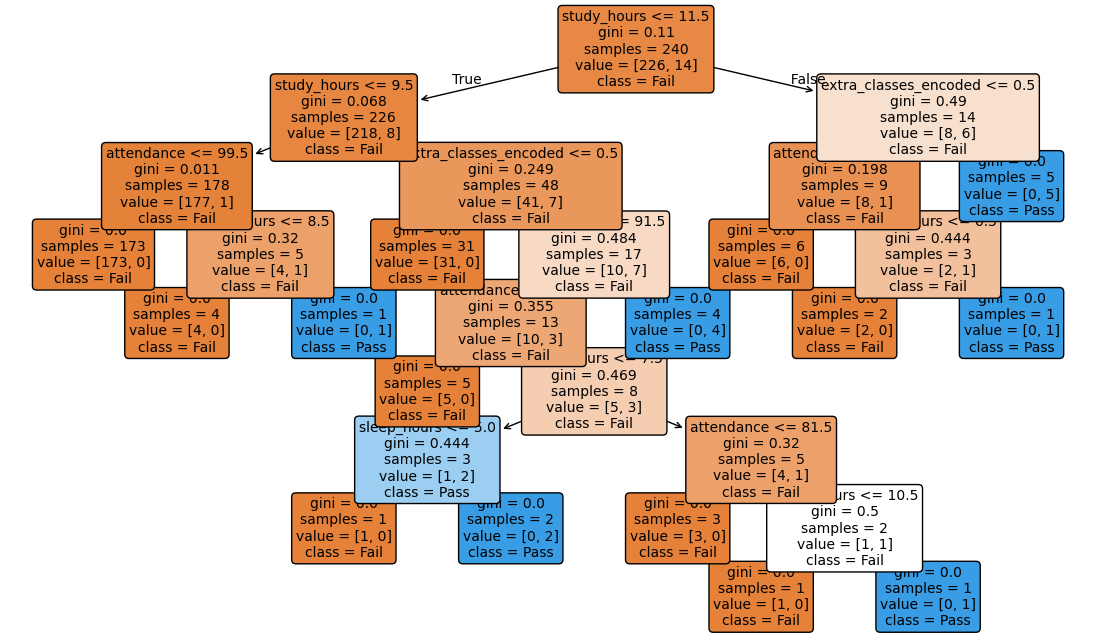

In [4]:
#Decision Tree (no depth limit)
dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train, y_train)

y_pred_dt_full = dt_full.predict(X_test)
acc_dt_full = accuracy_score(y_test, y_pred_dt_full)
print("Decision Tree (no max_depth) accuracy:", acc_dt_full)
print(classification_report(y_test, y_pred_dt_full))

plt.figure(figsize=(14,8))
plot_tree(dt_full, feature_names=feature_cols, class_names=['Fail','Pass'],
          filled=True, rounded=True, fontsize=10)
plt.show()


max_depth=2, accuracy=0.950


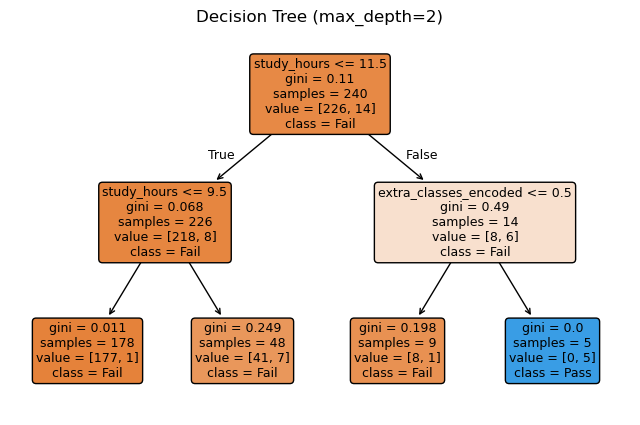

max_depth=3, accuracy=0.950


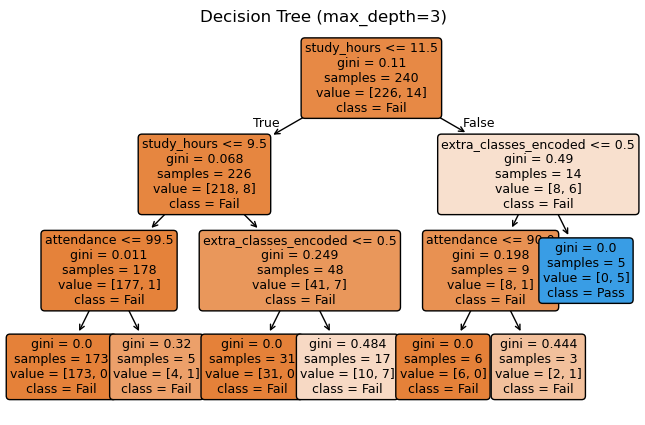

max_depth=5, accuracy=0.983


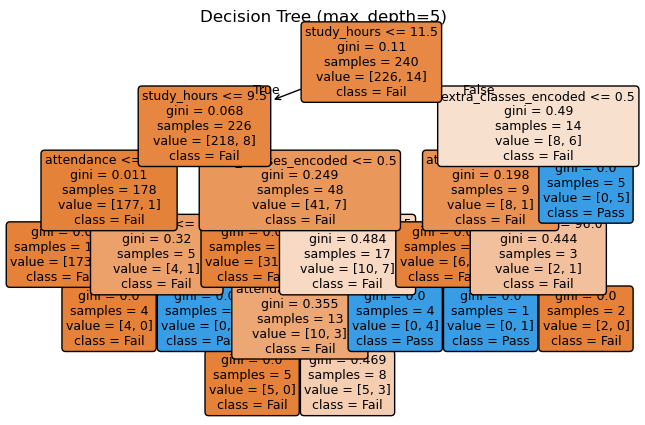

{2: 0.95, 3: 0.95, 5: 0.9833333333333333}

In [5]:
#Mini-challenge: max_depth = 2, 3, 5
depths = [2, 3, 5]
depth_scores = {}

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    depth_scores[d] = acc
    print(f"max_depth={d}, accuracy={acc:.3f}")
    
    plt.figure(figsize=(8,5))
    plot_tree(dt, feature_names=feature_cols, class_names=['Fail','Pass'],
              filled=True, rounded=True, fontsize=9)
    plt.title(f"Decision Tree (max_depth={d})")
    plt.show()

depth_scores


In [6]:
# 6) Logistic Regression
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42))
pipe_lr.fit(X_train, y_train)

y_pred_lr = pipe_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression accuracy:", acc_lr)
print(classification_report(y_test, y_pred_lr))


Logistic Regression accuracy: 0.9833333333333333
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       1.00      0.75      0.86         4

    accuracy                           0.98        60
   macro avg       0.99      0.88      0.92        60
weighted avg       0.98      0.98      0.98        60



In [7]:
# Compare models
print("Decision Tree (no limit):", acc_dt_full)
for d,a in depth_scores.items():
    print(f"DecisionTree (max_depth={d}): {a}")
print("Logistic Regression:", acc_lr)


Decision Tree (no limit): 1.0
DecisionTree (max_depth=2): 0.95
DecisionTree (max_depth=3): 0.95
DecisionTree (max_depth=5): 0.9833333333333333
Logistic Regression: 0.9833333333333333


In [ ]:
# Predict new student (with user input)

# Get inputs from user
study_hours = float(input("Enter weekly study hours: "))
attendance = float(input("Enter attendance percentage: "))
sleep_hours = float(input("Enter average sleep hours per night: "))
extra_classes_str = input("Did the student take extra classes? (Yes/No): ").strip().capitalize()

# Map Yes/No to 1/0
extra_classes_encoded = 1 if extra_classes_str == "Yes" else 0

# Create DataFrame for prediction
sample = pd.DataFrame([{
    'study_hours': study_hours,
    'attendance': attendance,
    'sleep_hours': sleep_hours,
    'extra_classes_encoded': extra_classes_encoded
}])

print("\nStudent details entered:")
print(sample)

# Predict with Decision Tree
pred_dt_full = dt_full.predict(sample)[0]
pred_dt_full_proba = dt_full.predict_proba(sample)[0]

# Predict with Logistic Regression
pred_lr = pipe_lr.predict(sample)[0]
pred_lr_proba = pipe_lr.predict_proba(sample)[0]

label_map = {0: 'Fail', 1: 'Pass'}

print("\nPrediction Results:")
print(f"Decision Tree: {label_map[pred_dt_full]} (probabilities [Fail, Pass] = {pred_dt_full_proba})")
print(f"Logistic Regression: {label_map[pred_lr]} (probabilities [Fail, Pass] = {pred_lr_proba})")
